# ML Application Example
## Regression

The task of this example is to implement a complete Data Driven pipeline (load, data-analysis, visualisation, model selection and optimization, prediction) on a specific Dataset. In this example the challenge is to perform a regression with different models to find the most accurate prediction.  


## Dataset 
The notebook will upload a public available dataset: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise
<blockquote>
  <b>Source:</b>
    Donor: Dr Roberto Lopez robertolopez@intelnics.com Intelnics
    <br/>
    Creators: Thomas F. Brooks, D. Stuart Pope and Michael A. Marcolini NASA
    <br/>
    <b>Data Set Information:</b>
    NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections 
    conducted in an anechoic wind tunnel.
    The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the 
    airfoil and the observer position were the same in all of the experiments. 
    <br/>
    <b>Attribute Information:</b>
    This problem has the following inputs: 
    <code><br/> 1. Frequency, in Hertzs.                          </code>
    <code><br/> 2. Angle of attack, in degrees.                   </code>
    <code><br/> 3. Chord length, in meters.                       </code>
    <code><br/> 4. Free-stream velocity, in meters per second.    </code>
    <code><br/> 5. Suction side displacement thickness, in meters.</code>
    <br/>
    The only output is:
    <code><br/>6. Scaled sound pressure level, in decibels.        </code>
</blockquote>

In [1]:
# algebra
import numpy as np
# data structure
import pandas as pd
# data visualization
import matplotlib.pylab as plt
import seaborn as sns
#file handling
from pathlib import Path


# Data load
The process consist in downloading the data if needed, loading the data as a Pandas dataframe

In [2]:
    
filename  = "airfoil_self_noise.dat"
separator = '\t'
columns   = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level']

#if the dataset is not already in the working dir, it will download
my_file = Path(filename)
if not my_file.is_file():
  print("Downloading dataset")
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat


In [3]:
#function to semplificate the load of dataset, in case it is a csv, tsv or excel file
#output is a pandas dataframe 
def load_csv(filename,separator,columns):
    
    try:
    
        csv_table = pd.read_csv(filename,sep=separator,names=columns)
    
    except:
        
        csv_table = pd.read_excel(filename,names=columns)
    print("n. samples: {}".format(csv_table.shape[0]))
    print("n. columns: {}".format(csv_table.shape[1]))

    return csv_table #.dropna()

data = load_csv(filename,separator,columns)

n. samples: 1503
n. columns: 6


# Data Analysis and Visualization
In this section confidence with the data is gained, data are plotted and cleaned

In [4]:
#How does the dataset look like? 
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
#Name of all columns
print(data.columns.values)

['Frequency' 'Angle of attack' 'Chord length' 'Free-stream velocity'
 'Suction side displacement thickness' 'Scaled sound pressure level']


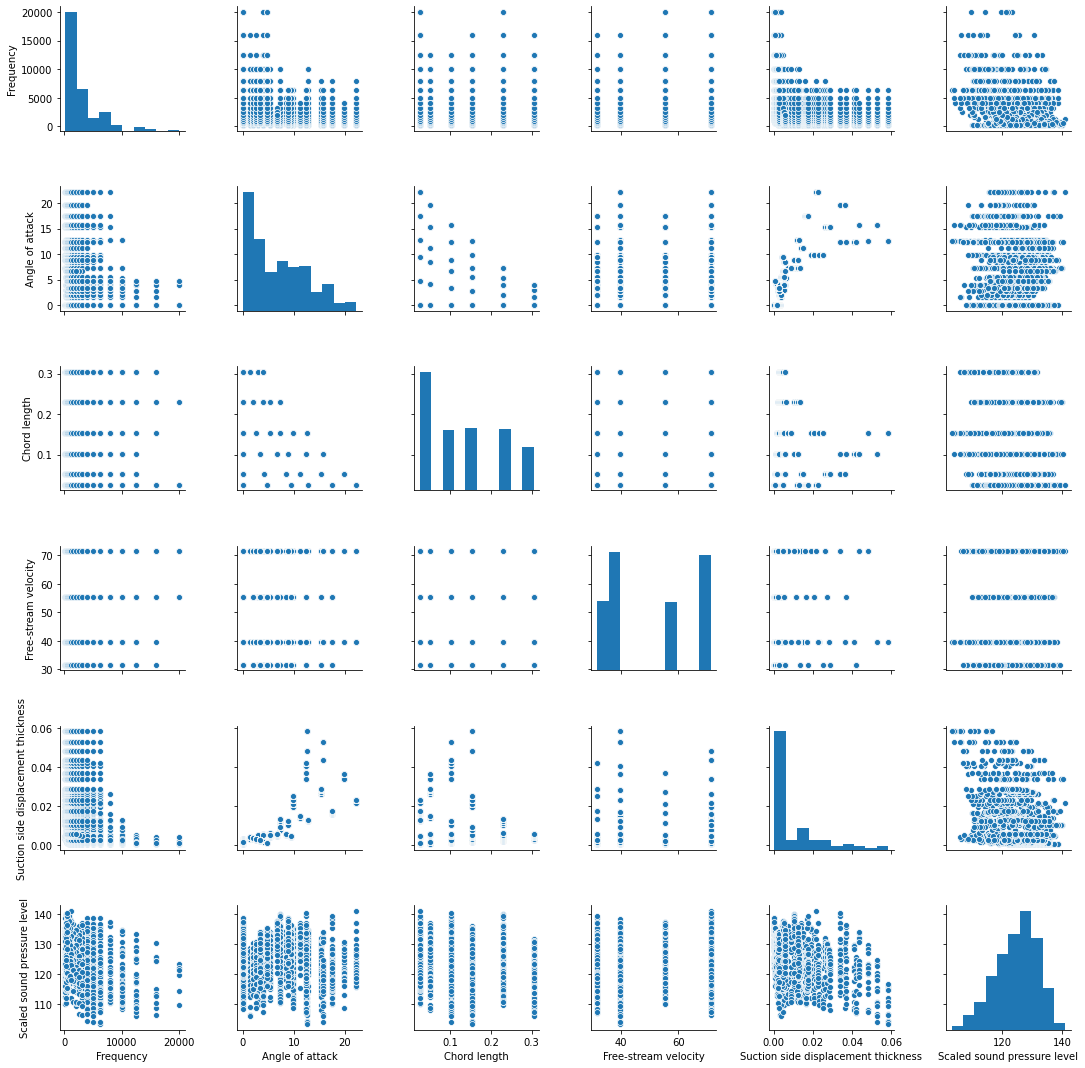

In [6]:
#let's have a look at the data and their correlations, if any
sns.pairplot(data)

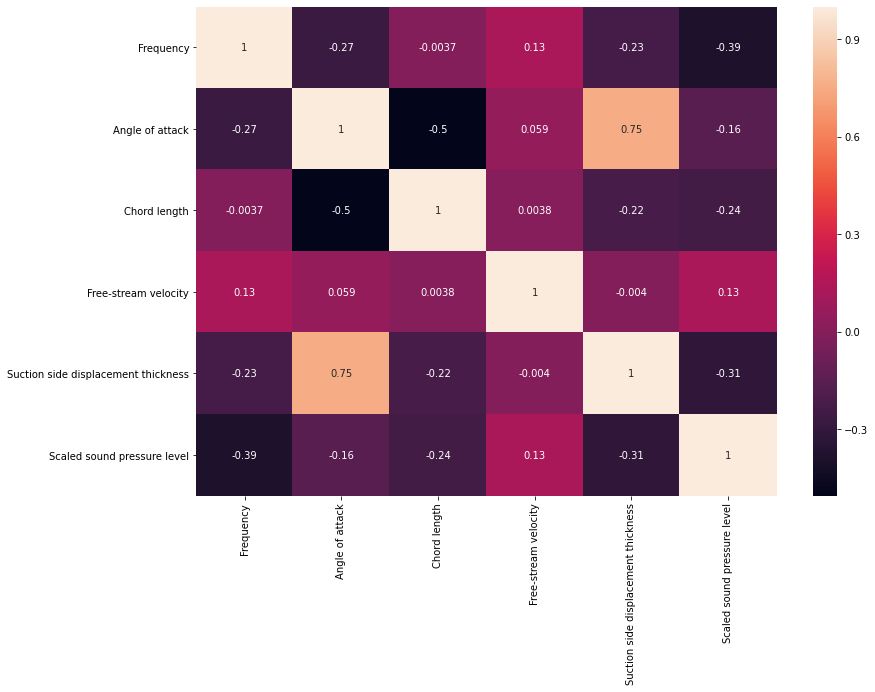

In [7]:
#Calculate the correlation matrix
corrMatrix = data.corr()

plt.figure(figsize=[13,9])
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [8]:
#Select only the interesting variable for the model, and remove any anomalous value (e.g. "nan")
#data = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8' ,'Y1', 'Y2']]
data = data.dropna()

# Machine Learning
Here the interesting input features and output to predict for the task are selected, the data are opportunelly preprocessed (i.e. normalized), the dataset is splitted in two separate train and test subsets, each model is trained on the training data and evaluated against a test set.<br/>
The evaluation metrics list can be found <a href='https://scikit-learn.org/stable/modules/model_evaluation.html'>here</a>

In [63]:
#the module needed for the modeling and data mining are imported
#Cross-Validation 
from sklearn.model_selection import train_test_split
#Data normalization
from sklearn.preprocessing   import StandardScaler
#metrics to evaluate the model
from sklearn.metrics import median_absolute_error

In [64]:
#Selection of feature and output variable, definition of the size (fraction of the total) of the random selected test set
input_features = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness']
output         = ['Scaled sound pressure level']
test_size      = 0.33
random_state   = 0

In [65]:
#not preprocessed data
unnormalized_X,unnormalized_y = data[input_features],data[output]

In [66]:
# normalisation
#Having features on a similar scale can help the model converge more quickly towards the minimum
scaler_X = StandardScaler().fit(unnormalized_X)
scaler_y = StandardScaler().fit(unnormalized_y)
X = scaler_X.transform(unnormalized_X)
y = scaler_y.transform(unnormalized_y)

In [67]:
#check if nan are present on the data after normalization to avoid trouble later
sum(np.isnan(X))

array([0, 0, 0, 0, 0])

In [68]:
# basic train-test dataset random split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [72]:
#dictionary to help the display of the results
Score_Dict = {}

#function introduced to simplifies the following comparison and test of the various
#return the trained model and the score of the selected metrics
def fit_predict_plot(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train.ravel())

    pred_normalized_y_test = model.predict(X_test)
    pred_y_test            = scaler_y.inverse_transform(pred_normalized_y_test)
    real_y_test            = scaler_y.inverse_transform(y_test)

#Alternative metrics are listed here:https://scikit-learn.org/stable/modules/model_evaluation.html
    mse_score = median_absolute_error(real_y_test,pred_y_test)
    
    model_name = type(model).__name__
    if(model_name=='GridSearchCV'):
        model_name ='CV_'+type(model.estimator).__name__
    
    Score_Dict[model_name]=mse_score

    plt.figure(figsize=[5,5])
    plt.scatter(real_y_test,pred_y_test)
    plt.plot([real_y_test.min(),real_y_test.max()],[real_y_test.min(),real_y_test.max()],'k:')
    plt.axis('equal')
    plt.title("Median Absolute Error: {:.2f}".format(mse_score))
    plt.xlabel('True Scaled sound pressure level')
    plt.ylabel('Predicted Scaled sound pressure level')
    
    return model,mse_score



## Linear models
Used linear models in this example are:
<ul>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Linear Regression</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">Lasso</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">Ridge</a></li>
</ul>

In [73]:
#Import the module that allows to access the Linear Regression, Lasso and Ridge algorithm
from sklearn import linear_model

[-0.58075817 -0.35149116 -0.49710216  0.24381476 -0.28756381]
0.006062615114234641


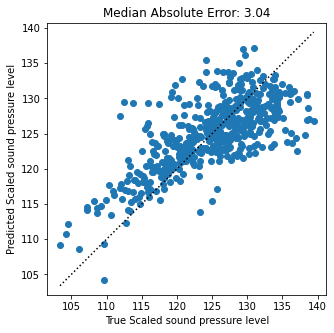

In [74]:
#initialization, fit and evaluation of the model
model = linear_model.LinearRegression()
basic_linear_model, basic_linear_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

#check the output of the model
print(basic_linear_model.coef_)
print(basic_linear_model.intercept_)



# Ridge
For advanced algorithms, hyper-parameters need to be specified, they influence the convergence and the results of the model.  

In [75]:
# Regularization strength hyper-parameter; must be a positive float
alpha = 10

[-0.5713632  -0.33801224 -0.48617013  0.23923353 -0.29018472]


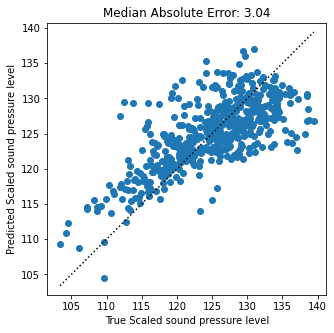

In [76]:
#initialization, fit and evaluation of the model
model = linear_model.Ridge(alpha=alpha)
ridge_model, ridge_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

#check the output of the model
print(ridge_model.coef_)

# Lasso


In [77]:
# hyperparametr: alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression
alpha = 0.1

[-0.38363646 -0.05435179 -0.25366282  0.09661686 -0.30994912]


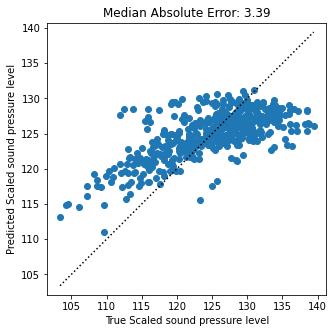

In [78]:

model = linear_model.Lasso(alpha=alpha)
lasso_model,lasso_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

print(lasso_model.coef_)

# Kernel ridge
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html">Kernel ridge regression (KRR)</a> combines ridge regression with the kernel trick.

In [79]:
from sklearn.kernel_ridge import KernelRidge

In [80]:
# regularization hyper-parameter
alpha  = 0.01
kernel = 'rbf'#'polynomial'

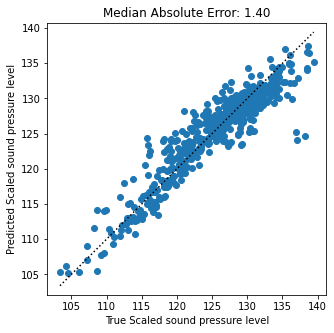

In [81]:
model = KernelRidge(alpha=alpha,kernel = kernel)
krr_model,krr_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# Support Vector Machines
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html">Epsilon-Support Vector Regression</a>

In [82]:
from sklearn.svm import SVR

In [83]:
# hyper-parameter
C = 100
kernel='rbf'

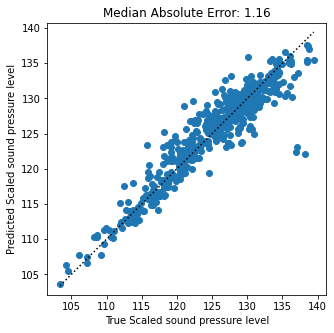

In [84]:
model = SVR(C=C,kernel=kernel,gamma='auto')
svr_model,svr_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# Random Forest
A <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">Random Forest Regressor</a> is a meta estimator that fits a number of classifying decision trees.

In [51]:
from sklearn.ensemble import RandomForestRegressor

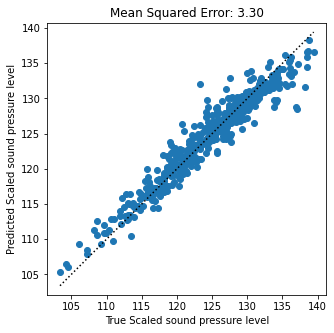

In [52]:
model = RandomForestRegressor(n_estimators=100)
random_forest_model,random_forest_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# Hyper parameters tuning and Cross Validation
Finding the best hyperparameter of interest without writing hundreds of lines of code is an important efficiency gain
<br/>CV is to avoid bias in the performance evaluation
<br/>
For the Tuning a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Grid Search with Cross Validation</a> is used. <br />
<code>cv :: Determines the cross-validation splitting strategy.</code>

In [53]:
from sklearn.model_selection import GridSearchCV
#Five fold splitting strategy
cv = 5

## Ridge with GridSearchCV

{'alpha': 10.0}


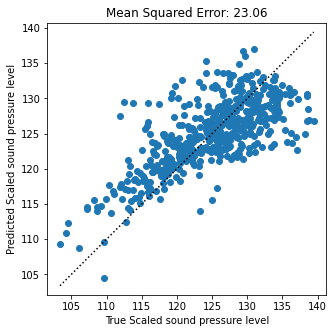

In [54]:
estimator  = linear_model.Ridge()
parameters = {'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

cv_ridge_model,cv_ridge_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(cv_ridge_model.best_params_)

## Lasso with GridSearchCV

{'alpha': 0.01}


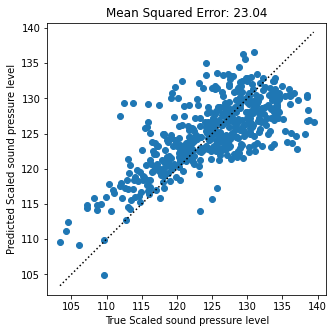

In [55]:
estimator  = linear_model.Lasso()
parameters = {'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

cv_lasso_model,cv_lasso_linear_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
#print the tuned hyper-parameters
print(cv_lasso_model.best_params_)



## KernelRidge with GridSearchCV

C:\Users\efeltres\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01, 'degree': 0, 'kernel': 'rbf'}


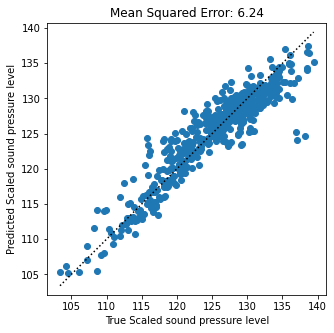

In [56]:
estimator  = KernelRidge()
parameters = {'kernel':['polynomial','rbf'],
              'degree':np.arange(10),
              'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

cv_krr_model,cv_krr_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(cv_krr_model.best_params_)

## Epsilon-Support Vector Regression with GridSearchCV

{'C': 100.0, 'kernel': 'rbf'}


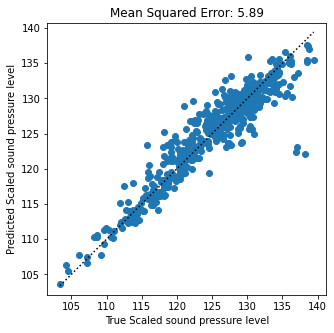

In [57]:
estimator  = SVR(gamma='auto')
parameters = {'kernel':['rbf'],
              'C':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

cv_svr_model,cv_svr_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(cv_svr_model.best_params_)

## Random Forest Regressor with GridSearchCV

{'n_estimators': 1000}


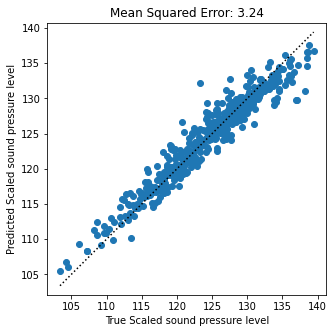

In [58]:
estimator  = RandomForestRegressor()
parameters = {'n_estimators':[10,100,1000]}
model = GridSearchCV(estimator, parameters,cv=cv)

cv_rf_model,cv_rf_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(cv_rf_model.best_params_)

<table><tr><th> Model</th><th> Accuracy</th></tr><tr> <td>LinearRegression</td><td>23.07</td></tr><tr> <td>Ridge</td><td>23.06</td></tr><tr> <td>Lasso</td><td>26.23</td></tr><tr> <td>KernelRidge</td><td>6.24</td></tr><tr> <td>SVR</td><td>5.89</td></tr><tr> <td>RandomForestRegressor</td><td>3.30</td></tr><tr> <td>CV_Ridge</td><td>23.06</td></tr><tr> <td>CV_Lasso</td><td>23.04</td></tr><tr> <td>CV_KernelRidge</td><td>6.24</td></tr><tr> <td>CV_SVR</td><td>5.89</td></tr><tr> <td>CV_RandomForestRegressor</td><td>3.24</td></tr></table>

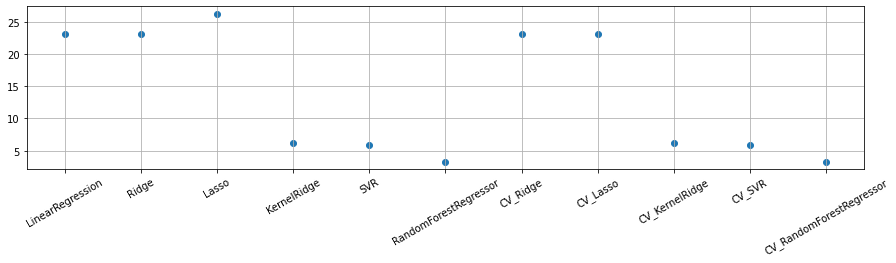

In [59]:
#print out the results in a table
from IPython.display import Markdown as md
from IPython.display import display


table = '<table><tr><th> Model</th><th> Accuracy</th></tr>'

for key, value in Score_Dict.items():
    table +='<tr> <td>'+key+'</td><td>' +'%.2f'%(value)+'</td></tr>'
table+='</table>'
display(md(table))


names = list(Score_Dict.keys())
values = list(Score_Dict.values())

plt.figure(figsize=(15, 3))
plt.scatter(names, values)
plt.xticks(rotation=30)
plt.grid()
